In [1]:
import numpy as np
import threading
import time
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
def matrix_multiply(A, B, result, index):
    result[index] = np.dot(A, B)

In [3]:
def run_with_threads(num_threads):
    start_time = time.time()
    threads = []
    chunk_size = len(matrices) // num_threads
    for i in range(num_threads):
        start_index = i * chunk_size
        end_index = start_index + chunk_size if i < num_threads - 1 else len(matrices)
        thread = threading.Thread(target=matrix_multiply_batch, args=(A, matrices[start_index:end_index], results, start_index))
        threads.append(thread)
        thread.start()
    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time

In [4]:
def matrix_multiply_batch(A, matrices_batch, results, start_index):
    for i, matrix in enumerate(matrices_batch):
        matrix_multiply(A, matrix, results, start_index + i)

In [5]:
A = np.random.rand(1000, 1000) # constant matrix
results = [None] * 100
matrices = [np.random.rand(1000, 1000) for _ in range(100)]  # random matrices

In [6]:
results_table = []
num_threads = [1, 2, 3, 4, 5, 6, 7, 8]
time_taken = []

In [7]:
for num_t in num_threads:
    ttime = run_with_threads(num_t)
    time_taken.append(ttime)
    results_table.append(("T="+str(num_t), round(ttime, 4)))

In [8]:
ans = list(zip(*results_table))


In [9]:
print(tabulate(ans, tablefmt="grid", showindex=["Threads", "Time taken (sec)"]))


+------------------+--------+--------+--------+--------+--------+--------+--------+--------+
| Threads          | T=1    | T=2    | T=3    | T=4    | T=5    | T=6    | T=7    | T=8    |
+------------------+--------+--------+--------+--------+--------+--------+--------+--------+
| Time taken (sec) | 6.8129 | 7.2299 | 6.5465 | 7.1379 | 5.7989 | 7.2787 | 5.8495 | 7.4354 |
+------------------+--------+--------+--------+--------+--------+--------+--------+--------+


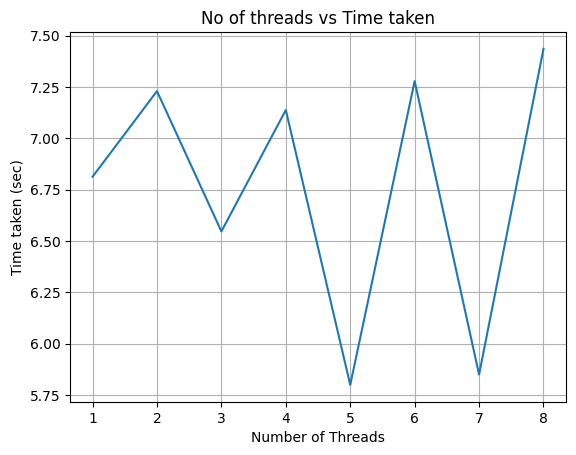

In [10]:
plt.plot(num_threads, time_taken)
plt.xlabel('Number of Threads')
plt.ylabel('Time taken (sec)')
plt.title('No of threads vs Time taken')
plt.xticks(num_threads)
plt.grid(True)
plt.show()